In [1]:
import pandas as pd
import numpy as np

In [2]:
abbrevs_df = pd.read_csv("./data-USstates-master/state-abbrevs.csv")

areas_df = pd.read_csv("./data-USstates-master/state-areas.csv")
pop_df = pd.read_csv("./data-USstates-master/state-population.csv")

In [3]:
usa_area = areas_df[areas_df['state'] != 'Puerto Rico']['area (sq. mi)'].sum()

In [4]:
pop_df.rename(columns={'state/region':'state'}, inplace=True)

In [5]:
merged_df = pd.merge(pop_df, abbrevs_df, left_on='state', right_on='abbreviation', how='outer').drop(['abbreviation'], axis=1)
merged_df = merged_df.rename(columns={'state_x':'state_abbrev', 'state_y':'state_full'})


In [6]:
merged_df.loc[merged_df['state_abbrev'] == 'USA', 'state_full'] = 'United States of America'
merged_df.loc[merged_df['state_abbrev'] == 'PR', 'state_full'] = 'Puerto Rico'

In [7]:
final = pd.merge(merged_df, areas_df, left_on='state_full', right_on='state', how='outer')
final = final.drop('state', axis=1).rename(columns={'state_full':'state'})

In [8]:
final.loc[final['state_abbrev'] == 'USA', 'area (sq. mi)'] = usa_area
final = final.drop('state_abbrev', axis=1)

In [9]:
data2010 = final.query("year == 2010 & ages == 'total'")[['state', 'population', 'area (sq. mi)']].reset_index(drop=True)
data2010['density'] = data2010['population'] / data2010['area (sq. mi)']


### Birth Data

In [10]:
birth_df = pd.read_csv("./data-USstates-master/births.csv")

In [11]:
birth_df['decade'] = 10 * (birth_df['year']//10)
birth_df['decade'] = birth_df['decade'].astype(str) + 's'

In [20]:
birth_df

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960s
1,1969,1,1.0,M,4440,1960s
2,1969,1,2.0,F,4454,1960s
3,1969,1,2.0,M,4548,1960s
4,1969,1,3.0,F,4548,1960s
...,...,...,...,...,...,...
15542,2008,10,NaN,M,183219,2000s
15543,2008,11,NaN,F,158939,2000s
15544,2008,11,NaN,M,165468,2000s
15545,2008,12,NaN,F,173215,2000s


In [29]:
birth_df.pivot_table('births', columns='gender', index='decade', aggfunc='sum')

gender,F,M
decade,,
1960s,1753634,1846572
1970s,16263075,17121550
1980s,18310351,19243452
1990s,19479454,20420553
2000s,18229309,19106428


In [18]:
by_gender = birth_df.groupby(['gender', 'year'])['births'].sum()

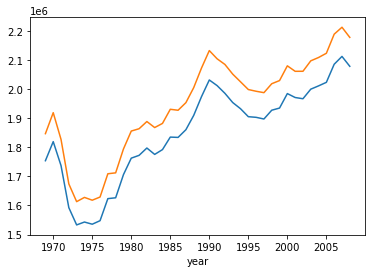

In [22]:
by_gender['F'].plot()
by_gender['M'].plot()